In [6]:
import pandas as pd
import japanize_matplotlib
from datetime import datetime

In [2]:
url = "/Users/xxxx/Downloads/Daily_Port_Activity_Data_and_Trade_Estimates.csv"

In [16]:
df = pd.read_csv(url)
df.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019/01/01 00:00:00+00,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,...,25697.698904,25697.698904,0.0,111203.241240,0.0,0.0,0.0,111203.241240,111203.241240,1
1,2019/01/02 00:00:00+00,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,89637.333333,0.0,0.0,0.0,89637.333333,89637.333333,2
2,2019/01/03 00:00:00+00,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,...,693.152652,693.152652,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019/01/04 00:00:00+00,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,68710.607753,0.0,0.0,0.0,68710.607753,68710.607753,4
4,2019/01/05 00:00:00+00,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,11092.054706,0.0,0.0,0.0,11092.054706,11092.054706,5


In [21]:
dfx = pd.pivot_table(df,index='date',columns='country',values='import',aggfunc='sum')

In [22]:
dfx.index = [datetime.strptime(s[:10],"%Y/%m/%d") for s in list(dfx.index)]

In [23]:
dfx.resample('ME').sum().tail()

country,Albania,Algeria,American Samoa,Angola,Anguilla,Antigua and Barbuda,Argentina,Aruba,Australia,Azerbaijan,...,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Vanuatu,Venezuela,Vietnam,Yemen
2025-01-31,137516.349827,3.112689e+06,42813.425222,998674.026614,11213.689734,46182.025971,1.728020e+06,72886.258063,1.282670e+07,238924.568518,...,205336.082875,2.027456e+07,1.444119e+07,6.105039e+07,746340.855296,793086.947843,56114.933182,597841.142019,8.714891e+06,1.086282e+06
2025-02-28,88922.411819,3.037123e+06,10101.250814,994412.312780,4881.494106,11238.375570,1.508192e+06,37229.768029,1.196479e+07,185999.023407,...,242529.904506,1.847630e+07,1.268235e+07,5.375321e+07,270238.920646,770150.128509,36699.851261,540034.497442,8.542020e+06,1.053773e+06
2025-03-31,201331.292898,3.196576e+06,36279.952126,931447.982765,5790.894336,26971.518622,1.928277e+06,95079.281569,1.208072e+07,248225.170936,...,330819.207961,1.999148e+07,1.495982e+07,6.172127e+07,315489.703500,896206.716862,43460.114959,861199.432888,9.582123e+06,8.599916e+05
2025-04-30,169414.551144,3.697965e+06,45520.713445,950155.404788,6834.745945,78325.414138,1.692452e+06,96980.228539,1.213125e+07,344159.428180,...,283537.798867,1.800860e+07,1.407338e+07,6.170393e+07,446356.002606,925329.547980,14082.093331,824607.728255,1.080837e+07,8.107248e+05
2025-05-31,108298.584370,2.543051e+06,48241.866686,723288.654558,2196.976493,28491.525011,1.475973e+06,80864.286813,9.362618e+06,275071.704931,...,274370.814166,1.296362e+07,1.146120e+07,4.481092e+07,155681.940904,548006.339936,41015.816309,544917.411369,7.078716e+06,5.656527e+05


In [25]:
dfz = dfx.resample('ME').sum()

<Axes: >

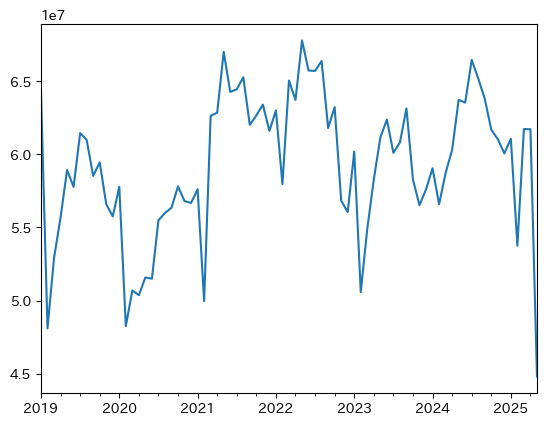

In [27]:
dfz['United States'].plot()